# Assignment 2 

# ST 4035_s15023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("LoanApprovalPrediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(598, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
len(df[df.duplicated()])

0

Therefore, no duplicated data in the dataset.

In [6]:
#categorical variables
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Credit_History'] = df['Credit_History'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')

#float variable
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)

df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents            float64
Education            category
Self_Employed        category
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

In [7]:
cat_var = ['Married','Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in cat_var:
    print(i ,":" , df[i].unique())

Married : ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Education : ['Graduate', 'Not Graduate']
Categories (2, object): ['Graduate', 'Not Graduate']
Self_Employed : ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Loan_Amount_Term : [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History : [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]
Property_Area : ['Urban', 'Rural', 'Semiurban']
Categories (3, object): ['Rural', 'Semiurban', 'Urban']
Loan_Status : ['Y', 'N']
Categories (2, object): ['N', 'Y']


C:\Users\Isini\AppData\Local\Temp\ipykernel_15732\464754306.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(i ,":" , df[i].unique())


In [8]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Therefore there are  missing values in the variables.

# Data Preprocessing

### Splitting the dataset into training and testing

In [9]:
df = df.drop(columns=['Loan_ID'])
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# split dataset into train and test set
trainset,testset = train_test_split(df,test_size=0.2,random_state=100)

### imputing missing values in the training set

In [11]:
trainset.isna().sum()

Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     12
Credit_History       39
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#mode imputation for categorical variables
mode_var = ['Loan_Amount_Term', 'Credit_History','Dependents']
for i in mode_var:
    imp_mode = trainset[i].mode()[0]
    print(i, imp_mode)
    trainset[i].fillna(imp_mode, inplace = True)

Loan_Amount_Term 360.0
Credit_History 1.0
Dependents 0.0


In [13]:
#mean imputation for 'LoanAmount'
mean1 = trainset['LoanAmount'].mean()
trainset['LoanAmount'].fillna(mean1, inplace = True)
print('LoanAmount', mean1)

LoanAmount 140.1695652173913


In [14]:
trainset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Test Set

In [15]:
testset.isna().sum()

Gender                0
Married               0
Dependents            4
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            3
Loan_Amount_Term      2
Credit_History       10
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#mode imputation
mode_var = ['Loan_Amount_Term', 'Credit_History','Dependents']
for i in mode_var:
    imp_modetest = testset[i].mode()[0]
    print(i, imp_modetest)
    testset[i].fillna(imp_modetest, inplace = True)

Loan_Amount_Term 360.0
Credit_History 1.0
Dependents 0.0


In [17]:
#mean imputation for 'LoanAmount'
mean1_test = testset['LoanAmount'].mean()
testset['LoanAmount'].fillna(mean1_test, inplace = True)
print('LoanAmount', mean1_test)

LoanAmount 163.83760683760684


#mean imputation for 'dependants'
mean2_test = round(testset['Dependents'].mean(),0)
testset["Dependents"].fillna(mean2_test, inplace = True)
print('Dependents', mean2_test)

In [18]:
testset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Descriptive Analysis

#### Response variable

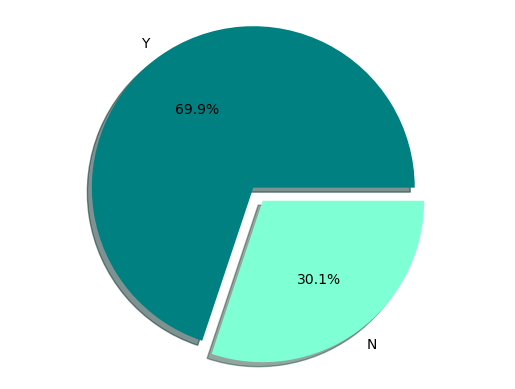

Total number of customers in the training set: 478
Y    334
N    144
Name: Loan_Status, dtype: int64


In [19]:
target = trainset["Loan_Status"].value_counts()
colors = ['teal', 'aquamarine']
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0],colors=colors)
ax1.axis('equal')
plt.show()
print('Total number of customers in the training set:', trainset['Loan_Status'].count())
print(trainset['Loan_Status'].value_counts())

Therefore the train set looks like to be unbalanced. Thus in the model fitting it is needed to use a balancing technique if the models performance not that good.

#### Loan_Status across gender 

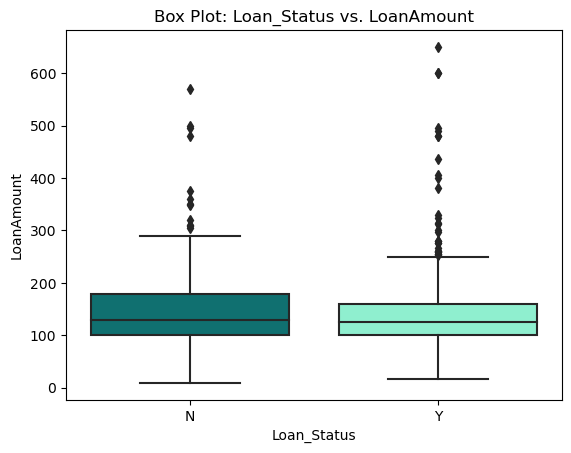

In [20]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette=['teal', 'aquamarine'])
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Box Plot: Loan_Status vs. LoanAmount')
plt.show()

 Therefore there is a approximately same distribution over the gender types. However there are several outlying observations and also the median loan amount is aproximately same in both occurances.

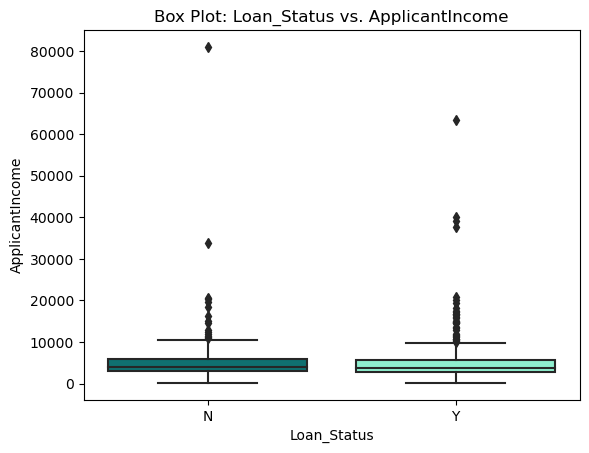

In [21]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette=['teal', 'aquamarine'])
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.title('Box Plot: Loan_Status vs. ApplicantIncome')
plt.show()

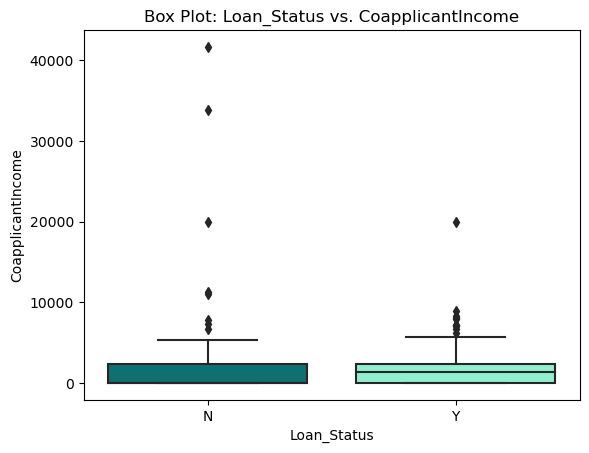

In [22]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette=['teal', 'aquamarine'])
plt.xlabel('Loan_Status')
plt.ylabel('CoapplicantIncome')
plt.title('Box Plot: Loan_Status vs. CoapplicantIncome')
plt.show()

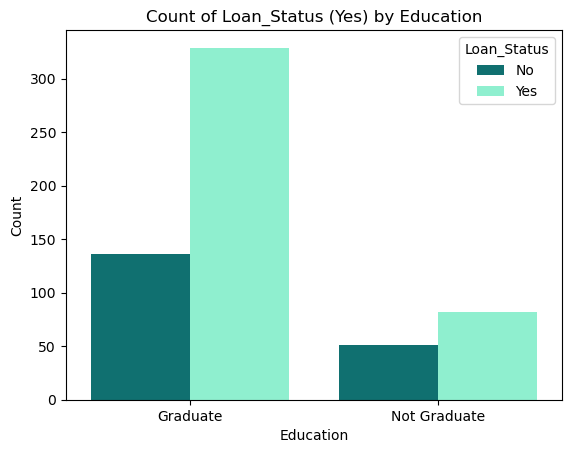

In [23]:
sns.countplot(x='Education', hue='Loan_Status', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Loan_Status (Yes) by Education')
plt.legend(title='Loan_Status', loc='upper right', labels=['No', 'Yes']) 

plt.show()

Therefore the graduated people are more likely to get the loan approved.

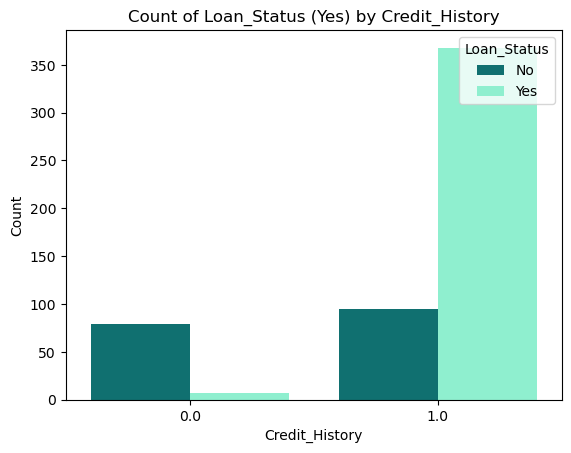

In [24]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Count of Loan_Status (Yes) by Credit_History')
plt.legend(title='Loan_Status', loc='upper right', labels=['No', 'Yes']) 

plt.show()

Therefore customers having good credit history are more likely to get the loan approved.

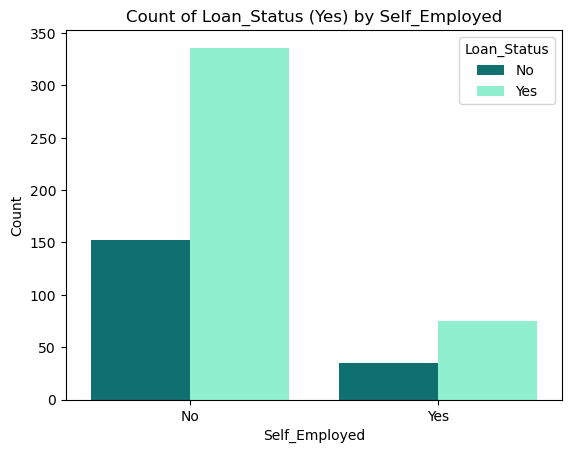

In [25]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Count of Loan_Status (Yes) by Self_Employed')
plt.legend(title='Loan_Status', loc='upper right', labels=['No', 'Yes']) 

plt.show()

non-self employed customers has most of the loan approvals in the dataset.

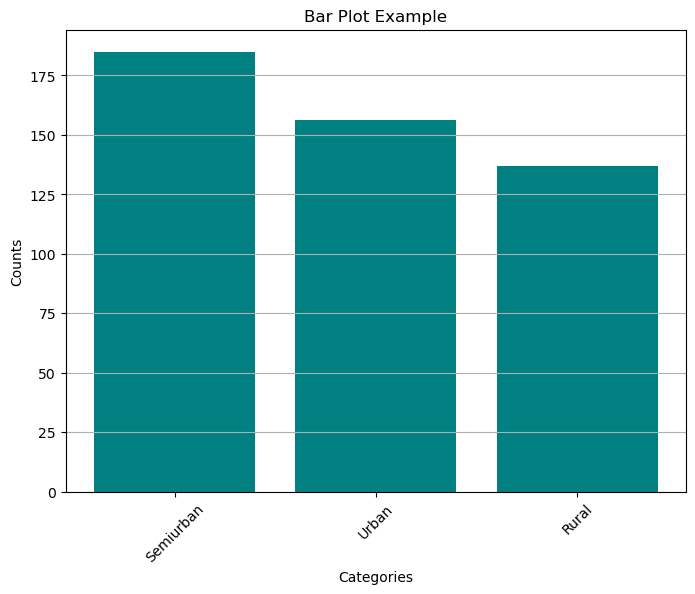

In [26]:
categories = trainset['Property_Area'].value_counts().index
values = trainset['Property_Area'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='teal')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot Example')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis

plt.show()

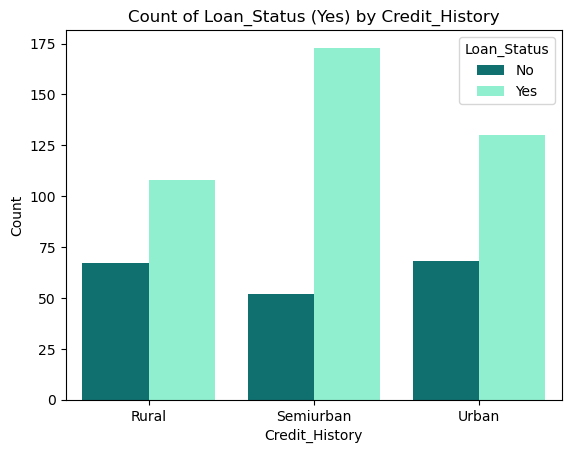

In [27]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Count of Loan_Status (Yes) by Credit_History')
plt.legend(title='Loan_Status', loc='upper right', labels=['No', 'Yes']) 

plt.show()

Customers from semi urban areas have get the loan approved most.

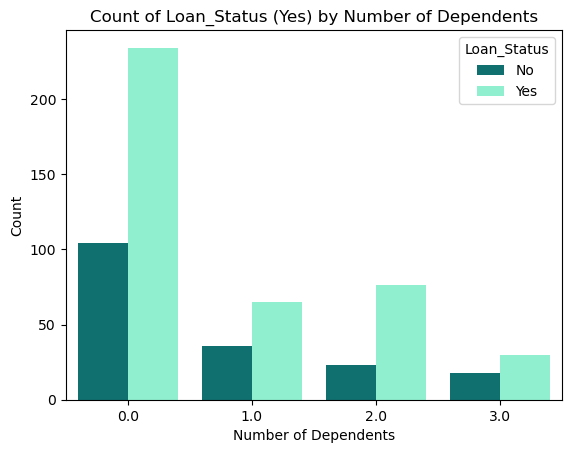

In [28]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Count of Loan_Status (Yes) by Number of Dependents')
plt.legend(title='Loan_Status', loc='upper right', labels=['No', 'Yes'])

plt.show()

Therefore, when the no of dependents increases, the the loan approval rate also seems to have been reduced.

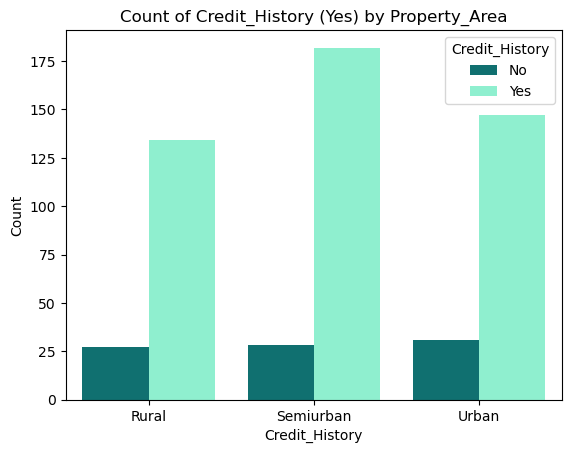

In [29]:
sns.countplot(x='Property_Area', hue='Credit_History', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Count of Credit_History (Yes) by Property_Area')
plt.legend(title='Credit_History', loc='upper right', labels=['No', 'Yes']) 

plt.show()

Therefore people from rural areas seems to have low Credit_History.

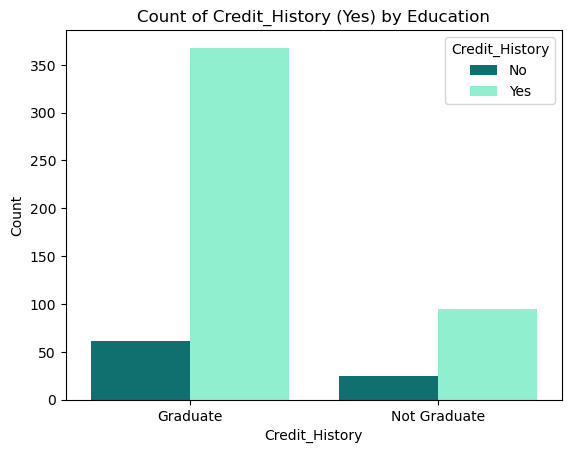

In [30]:
sns.countplot(x='Education', hue='Credit_History', data=df, palette=['teal', 'aquamarine'])

plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Count of Credit_History (Yes) by Education')
plt.legend(title='Credit_History', loc='upper right', labels=['No', 'Yes']) 

plt.show()

Therefore graduated customers seems to have a good Credit_History compared to not graduated customers.

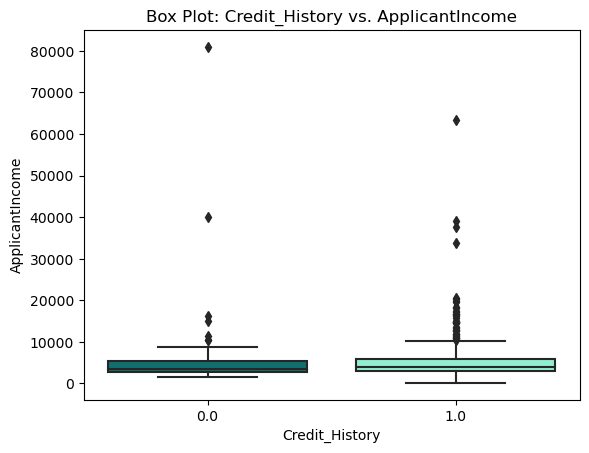

In [31]:
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=df, palette=['teal', 'aquamarine'])
plt.xlabel('Credit_History')
plt.ylabel('ApplicantIncome')
plt.title('Box Plot: Credit_History vs. ApplicantIncome')
plt.show()

#### correlation between the variables

In [32]:
#creating dummies for norminal variables
nominal_var = ['Gender','Married','Self_Employed','Credit_History','Property_Area','Education']

trainset = pd.get_dummies(trainset, columns=nominal_var, drop_first=True)
testset = pd.get_dummies(testset, columns=nominal_var, drop_first=True)
trainset.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
590,1.0,3400.0,2500.0,173.000000,360.0,Y,1,1,0,1,1,0,0
511,0.0,4680.0,2087.0,140.169565,360.0,N,1,0,0,1,1,0,0
221,0.0,4735.0,0.0,138.000000,360.0,N,1,1,1,1,0,1,1
341,0.0,2625.0,6250.0,187.000000,360.0,Y,1,1,0,1,0,0,0
378,0.0,2346.0,1600.0,132.000000,360.0,Y,1,0,0,1,1,0,1


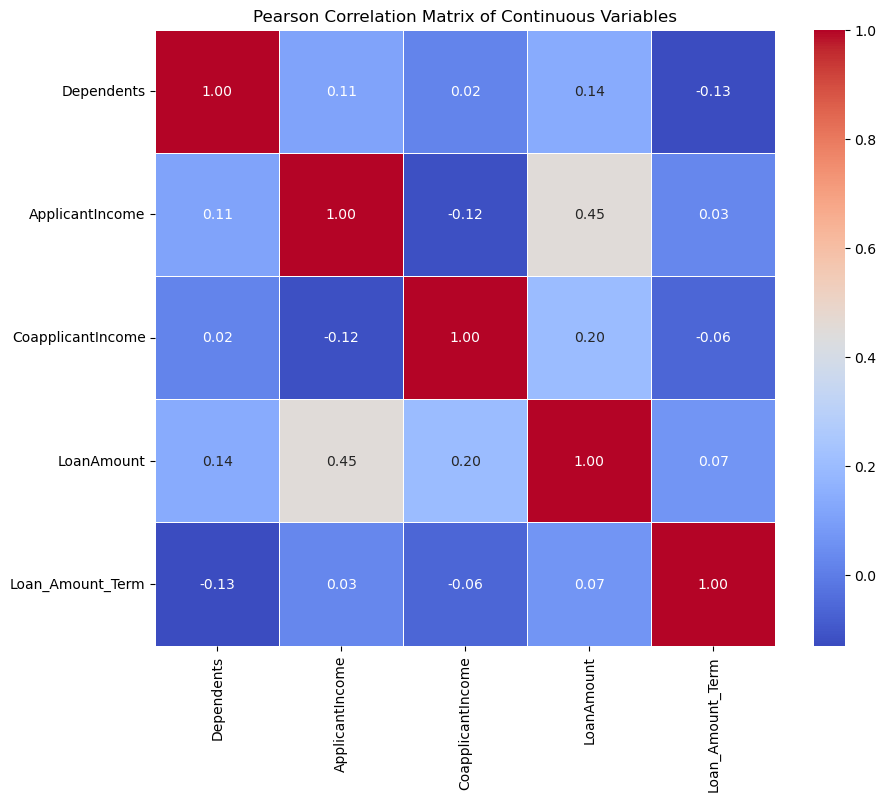

In [33]:
nvar = trainset.select_dtypes(include=["int32","int64","float64"])
correlation_matrix = nvar.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f" ,cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix of Continuous Variables')
plt.show()

According to this there is no multicollinearity in the numerical predictors. The largest covariance that can be seen is 0.45 between CoapplicantIncome and LoanAmount.

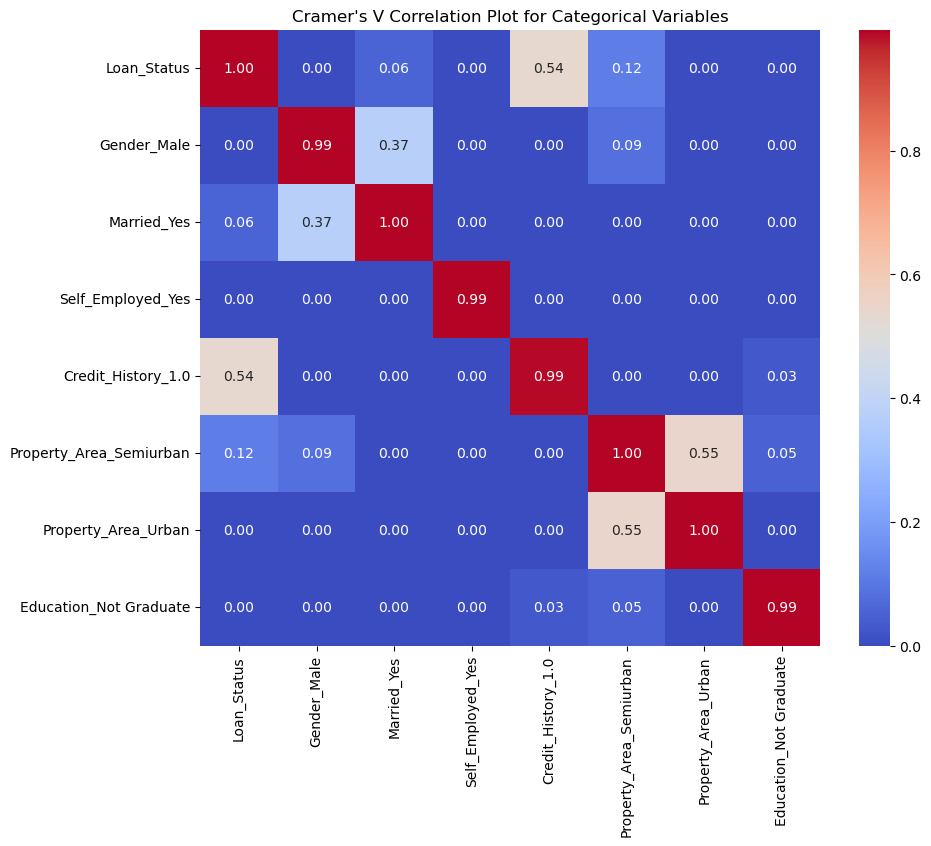

In [34]:
#cramer's v heatmap
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Extracted categorical variables
categorical_variables = trainset.drop(columns = nvar)

# Calculate Cramer's V correlation matrix
cramer_matrix = pd.DataFrame(index=categorical_variables.columns, columns=categorical_variables.columns, dtype=float)
for i in categorical_variables.columns:
    for j in categorical_variables.columns:
        cramers = cramers_v(categorical_variables[i], categorical_variables[j])
        cramer_matrix.loc[i, j] = cramers

# Create a Cramer's V correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V Correlation Plot for Categorical Variables")
plt.show()


According to this there is no multicollinearity in the numerical predictors. 
The largest covariance that can be seen is 0.55 between Property_Area_Urban and Property_Area_Semiurban.

0.54 of correlation between Credit_History_1.0 and Loan_Status.

0.37 correlation between Married_Yes and Gender_Male. 

The others are very small and zero.

#### Principal Component Analysis

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
nvar.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


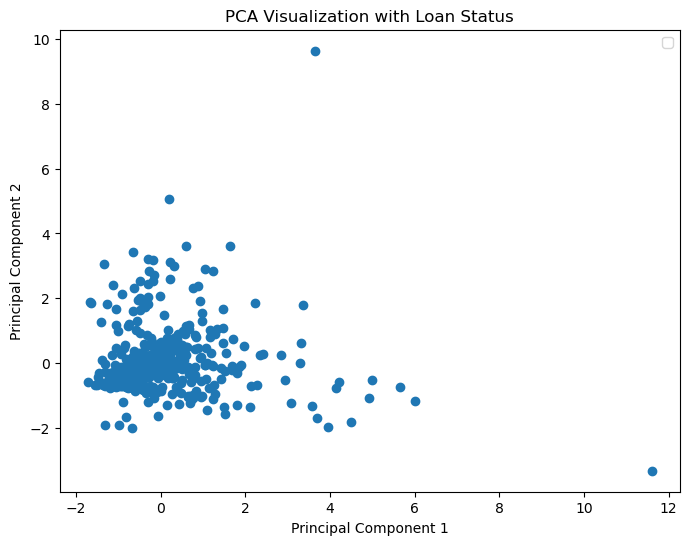

In [37]:
# numerical columns
nvar = trainset.select_dtypes(include=["int32","int64","float64"])
ncol = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

# Get X_train with numerical columns
X_train_numerical = nvar

# Standardize the numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization with Loan Status')
plt.show()

pca_loadings = pca.components_.T

From the score plot of the PCA we can get an idea about whether there are any observation clusters in the dataset. So according to this there aren't any observation clusters present in the dataset.

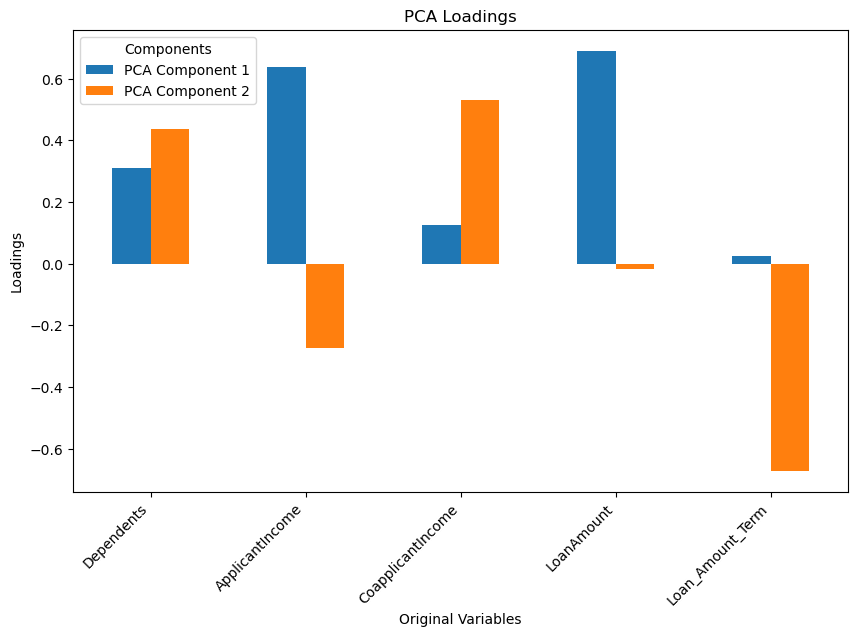

In [38]:
pca_loadings = pca.components_.T

# Create a DataFrame with loadings and column names
loadings_df = pd.DataFrame(pca_loadings, columns=[f"PCA Component {i+1}" for i in range(2)], index=ncol)

# Plot the loadings as a bar plot
plt.figure(figsize=(10, 6))
loadings_df.plot(kind='bar', ax=plt.gca())
plt.xlabel('Original Variables')
plt.ylabel('Loadings')
plt.title('PCA Loadings')
plt.legend(title='Components', loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Fitting Models

In [39]:
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
X_tr = trainset.drop(columns = ['Loan_Status'])
y_tr = trainset['Loan_Status']

X_test = testset.drop(columns = ['Loan_Status'])
y_test = testset['Loan_Status']

#### Applying SMOTE to balance the training dataset

In [41]:
oversample = SMOTE(random_state=0)
X_train, y_train = oversample.fit_resample(X_tr, y_tr)

# Display the class distribution after SMOTE
# print(pd.Series(y_train).value_counts())


## 1. Logistic regression

In [42]:
logi_model = LogisticRegression()

# Fit the model to the training data
logi_model.fit(X_train, y_train)

# Make predictions on the test data
logi_pred = logi_model.predict(X_test)

# Calculate accuracy
logi_accuracy = accuracy_score(y_test, logi_pred)
print(f"Accuracy: {logi_accuracy * 100:.2f}%")

Accuracy: 73.33%


C:\Users\Isini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#confusion matrix
print("\nConfusion Matrix of logistic regression::")
print(confusion_matrix(y_test, logi_pred))


Confusion Matrix of logistic regression::
[[23 20]
 [12 65]]


In [44]:
logi_confusion = confusion_matrix(y_test, logi_pred)
logi_class_wise_accuracy = logi_confusion.diagonal() / logi_confusion.sum(axis=1)
for class_idx, acc in enumerate(logi_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 53.49%
Class 1: Accuracy = 84.42%


## 2. Logistic Ridge Regression

In [45]:
lridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Fit the model to the training data
lridge_model.fit(X_train, y_train)

# Make predictions on the test data
lridge_pred = lridge_model.predict(X_test)

# Calculate and display accuracy
lridge_accuracy = accuracy_score(y_test, lridge_pred)
print(f"Accuracy: {lridge_accuracy * 100:.2f}%")

Accuracy: 74.17%


In [46]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lridge_pred))


Confusion Matrix:
[[21 22]
 [ 9 68]]


In [47]:
lridge_confusion = confusion_matrix(y_test, lridge_pred)
lridge_class_wise_accuracy = lridge_confusion.diagonal() / lridge_confusion.sum(axis=1)
for class_idx, acc in enumerate(lridge_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 48.84%
Class 1: Accuracy = 88.31%


## 3. Tree Based Model

### 3.1 Classification Tree

In [48]:
classi_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
classi_model.fit(X_train, y_train)

# Make predictions on the test data
classi_pred = classi_model.predict(X_test)

# Calculate and display accuracy
classi_accuracy = accuracy_score(y_test, classi_pred)
print(f"Accuracy: {classi_accuracy * 100:.2f}%")

Accuracy: 66.67%


In [49]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classi_pred))


Confusion Matrix:
[[22 21]
 [19 58]]


In [50]:
classi_confusion = confusion_matrix(y_test, classi_pred)
classi_class_wise_accuracy = classi_confusion.diagonal() / classi_confusion.sum(axis=1)
for class_idx, acc in enumerate(classi_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 51.16%
Class 1: Accuracy = 75.32%


### 3.2 Random Forest

Random Forest classifier is a ensemble learning where there are several classification trees running inside. This comes under Bagging techniques used in emsemble learning method. However random forest is usually considered as a model that does not overfit easily. 

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Calculate and display accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Accuracy: 75.00%


In [52]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Confusion Matrix:
[[23 20]
 [10 67]]


In [53]:
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_class_wise_accuracy = rf_confusion.diagonal() / rf_confusion.sum(axis=1)
for class_idx, acc in enumerate(rf_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 53.49%
Class 1: Accuracy = 87.01%


## 4. Naive Bayes

In [54]:
NB_model = GaussianNB()

# Create a Multinomial Naive Bayes Classifier (for discrete data)
# model = MultinomialNB()

# Fit the model to the training data
NB_model.fit(X_train, y_train)

# Make predictions on the test data
NB__pred = NB_model.predict(X_test)

# Calculate and display accuracy
NB_accuracy = accuracy_score(y_test, NB__pred)
print(f"Accuracy: {NB_accuracy * 100:.2f}%")

Accuracy: 75.83%


In [55]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, NB__pred))


Confusion Matrix:
[[20 23]
 [ 6 71]]


In [56]:
NB_confusion = confusion_matrix(y_test, NB__pred)
NB_class_wise_accuracy = NB_confusion.diagonal() / NB_confusion.sum(axis=1)
for class_idx, acc in enumerate(NB_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 46.51%
Class 1: Accuracy = 92.21%


## 5. Support Vector machine

In [57]:
svm_model = svm.SVC(kernel='linear')

# Fit the classifier to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {svm_accuracy * 100:.2f}%")

Accuracy: 75.00%


In [58]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))


Confusion Matrix:
[[22 21]
 [ 9 68]]


In [59]:
svm_confusion = confusion_matrix(y_test, svm_pred)
svm_class_wise_accuracy = svm_confusion.diagonal() / svm_confusion.sum(axis=1)
for class_idx, acc in enumerate(svm_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 51.16%
Class 1: Accuracy = 88.31%


In [60]:
# Display the results in a table
data = {'Model': ['Logistic Regression', 'Logistic Ridge Regression', 'Classification Tree', 'Random Forest', 
                  'Naive Bayes', 'Support Vector Machine'],
        'Accuracy': [logi_accuracy, lridge_accuracy, classi_accuracy, rf_accuracy, NB_accuracy, svm_accuracy]}

accuracy_df = pd.DataFrame(data)

print(accuracy_df)

                       Model  Accuracy
0        Logistic Regression  0.733333
1  Logistic Ridge Regression  0.741667
2        Classification Tree  0.666667
3              Random Forest  0.750000
4                Naive Bayes  0.758333
5     Support Vector Machine  0.750000


Therefore, out of all these fitted models,the one with the best accuracy is Naive Bayes model with 75.8% accuracy.  Also it has the followin class wise accuracy values

In [61]:
NB_confusion = confusion_matrix(y_test, NB__pred)
NB_class_wise_accuracy = NB_confusion.diagonal() / NB_confusion.sum(axis=1)
for class_idx, acc in enumerate(NB_class_wise_accuracy):
    print(f"Class {class_idx}: Accuracy = {acc * 100:.2f}%")

Class 0: Accuracy = 46.51%
Class 1: Accuracy = 92.21%
